In [2]:
#bibliotecas a serem utilizadas 
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)


Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [3]:
kalman=as.data.frame(read.table("../IoTa/1-100/resultados/df_kalmanSmoothing.txt"))
inter=as.data.frame(read.table("../IoTa/1-100/resultados/df_linear_interpolation.txt"))
locf=as.data.frame(read.table("../IoTa/1-100/resultados/df_locf.txt"))
mean=as.data.frame(read.table("../IoTa/1-100/resultados/df_mean.txt"))
median=as.data.frame(read.table("../IoTa/1-100/resultados/df_median.txt"))
malExp=as.data.frame(read.table("../IoTa/1-100/resultados/df_movingAverage_exponential.txt"))
malLin=as.data.frame(read.table("../IoTa/1-100/resultados/df_movingAverage_linear.txt"))
malSim=as.data.frame(read.table("../IoTa/1-100/resultados/df_movingAverage_simple.txt"))
spl=as.data.frame(read.table("../IoTa/1-100/resultados/df_spline_interpolation.txt"))
sti=as.data.frame(read.table("../IoTa/1-100/resultados/df_stine_interpolation.txt"))


In [4]:

names(kalman)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(inter)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(locf)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(mean)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(median)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malExp)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malLin)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malSim)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(spl)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(sti)=c("algoritmo" , "rmse", "mse", "mae", "mape")

func <- function(i){
    ob=c(i,i+100,i+200)
    
    return(ob)
}

#Tirando a média 
tamanhoGap= seq(1,100,1) 

mediaKal=c()
mediaInter=c()
mediaLocf=c()
mediaMean=c()
mediaMedian=c()
mediaMalExp=c()
mediaMalLin=c()
mediaMalSim=c()
mediaSpl=c()
mediaSti=c()

sdKal=c()
sdInter=c()
sdLocf=c()
sdMean=c()
sdMedian=c()
sdMalExp=c()
sdMalLin=c()
sdMalSim=c()
sdSpl=c()
sdSti=c()

varKal=c()
varInter=c()
varLocf=c()
varMean=c()
varMedian=c()
varMalExp=c()
varMalLin=c()
varMalSim=c()
varSpl=c()
varSti=c()


sdLacKal=c()
sdLacInter=c()
sdLacLocf=c()
sdLacMean=c()
sdLacMedian=c()
sdLacMalExp=c()
sdLacMalLin=c()
sdLacMalSim=c()
sdLacSpl=c()
sdLacSti=c()


varLacKal=c()
varLacInter=c()
varLacLocf=c()
varLacMean=c()
varLacMedian=c()
varLacMalExp=c()
varLacMalLin=c()
varLacMalSim=c()
varLacSpl=c()
varLacSti=c()


mediaLacKal=c()
mediaLacInter=c()
mediaLacLocf=c()
mediaLacMean=c()
mediaLacMedian=c()
mediaLacMalExp=c()
mediaLacMalLin=c()
mediaLacMalSim=c()
mediaLacSpl=c()
mediaLacSti=c()

a=c()
# Calculando a média das três lacunas do dia 
for(z in seq(1,100,1)){
    for (i in seq(z,9000,300)){
        a=(func(i))
        mediaLacInter=append(mediaLacInter, mean(inter$rmse[a]))
        mediaLacKal=append(mediaLacKal, mean(kalman$rmse[a])) 
        mediaLacLocf=append(mediaLacLocf,mean(locf$rmse[a]))
        mediaLacMean=append(mediaLacMean,mean(mean$rmse[a]))
        mediaLacMedian=append(mediaLacMedian,mean(median$rmse[a]))
        mediaLacMalExp=append(mediaLacMalExp,mean(malExp$rmse[a]))
        mediaLacMalLin=append(mediaLacMalLin,mean(malLin$rmse[a]))
        mediaLacMalSim=append(mediaLacMalSim,mean(malSim$rmse[a]))
        mediaLacSpl=append(mediaLacSpl,mean(spl$rmse[a]))
        mediaLacSti=append(mediaLacSti,mean(sti$rmse[a]))


        sdLacKal=append(sdLacKal, sd(kalman$rmse[a])) 
        sdLacInter=append(sdLacInter, sd(inter$rmse[a]))
        sdLacLocf=append(sdLacLocf,sd(locf$rmse[a]))
        sdLacMean=append(sdLacMean,sd(mean$rmse[a]))
        sdLacMedian=append(sdLacMedian,sd(median$rmse[a]))
        sdLacMalExp=append(sdLacMalExp,sd(malExp$rmse[a]))
        sdLacMalLin=append(sdLacMalLin,sd(malLin$rmse[a]))
        sdLacMalSim=append(sdLacMalSim,sd(malSim$rmse[a]))
        sdLacSpl=append(sdLacSpl,sd(spl$rmse[a]))
        sdLacSti=append(sdLacSti,sd(sti$rmse[a]))


        varLacKal=append(varLacKal, var(kalman$rmse[a])) 
        varLacInter=append(varLacInter, var(inter$rmse[a]))
        varLacLocf=append(varLacLocf,var(locf$rmse[a]))
        varLacMean=append(varLacMean,var(mean$rmse[a]))
        varLacMedian=append(varLacMedian,var(median$rmse[a]))
        varLacMalExp=append(varLacMalExp,var(malExp$rmse[a]))
        varLacMalLin=append(varLacMalLin,var(malLin$rmse[a]))
        varLacMalSim=append(varLacMalSim,var(malSim$rmse[a]))
        varLacSpl=append(varLacSpl,var(spl$rmse[a]))
        varLacSti=append(varLacSti,var(sti$rmse[a]))
    }
}

for (i in seq(1,3000,30)) {
    #calculando a média
    mediaInter=append(mediaInter,(mean(mediaLacInter[i:(i+29)])))
    mediaKal=append(mediaKal, (mean(mediaLacKal[i:(i+29)])))
    mediaLocf=append(mediaLocf, (mean(mediaLacLocf[i:(i+29)])))
    mediaMean=append(mediaMean, (mean(mediaLacMean[i:(i+29)])))
    mediaMedian=append(mediaMedian, (mean(mediaLacMedian[i:(i+29)])))
    mediaMalExp=append(mediaMalExp, (mean(mediaLacMalExp[i:(i+29)])))
    mediaMalLin=append(mediaMalLin, (mean(mediaLacMalLin[i:(i+29)])))
    mediaMalSim=append(mediaMalSim, (mean(mediaLacMalSim[i:(i+29)])))
    mediaSpl=append(mediaSpl, (mean(mediaLacSpl[i:(i+29)])))
    mediaSti=append(mediaSti, (mean(mediaLacSti[i:(i+29)])))
    
    #calculando o devio padrão
    sdInter=append(sdInter,(sd(sdLacInter[i:(i+29)])))
    sdKal=append(sdKal, (sd(sdLacKal[i:(i+29)])))
    sdLocf=append(sdLocf, (sd(sdLacLocf[i:(i+29)])))
    sdMean=append(sdMean, (sd(sdLacMean[i:(i+29)])))
    sdMedian=append(sdMedian, (sd(sdLacMedian[i:(i+29)])))
    sdMalExp=append(sdMalExp, (sd(sdLacMalExp[i:(i+29)])))
    sdMalLin=append(sdMalLin, (sd(sdLacMalLin[i:(i+29)])))
    sdMalSim=append(sdMalSim, (sd(sdLacMalSim[i:(i+29)])))
    sdSpl=append(sdSpl, (sd(sdLacSpl[i:(i+29)])))
    sdSti=append(sdSti, (sd(sdLacSti[i:(i+29)])))

    #calculando a variancia
    varInter=append(varInter,(var(varLacInter[i:(i+29)])))
    varKal=append(varKal, (var(varLacKal[i:(i+29)])))
    varLocf=append(varLocf, (var(varLacLocf[i:(i+29)])))
    varMean=append(varMean, (var(varLacMean[i:(i+29)])))
    varMedian=append(varMedian, (var(varLacMedian[i:(i+29)])))
    varMalExp=append(varMalExp, (var(varLacMalExp[i:(i+29)])))
    varMalLin=append(varMalLin, (var(varLacMalLin[i:(i+29)])))
    varMalSim=append(varMalSim, (var(varLacMalSim[i:(i+29)])))
    varSpl=append(varSpl, (var(varLacSpl[i:(i+29)])))
    varSti=append(varSti, (var(varLacSti[i:(i+29)])))

}
mediaInter=as.data.frame(mediaInter)
names(mediaInter)=c("media")
mediaInter$sd=sdInter
mediaInter$var=varInter
mediaInter$tamanho=tamanhoGap
mediaInter$algoritmo="Interpolation"

mediaKal=as.data.frame(mediaKal)
names(mediaKal)=c("media")
mediaKal$sd=sdKal
mediaKal$var=varKal
mediaKal$tamanho=tamanhoGap
mediaKal$algoritmo="Kalman"


mediaLocf=as.data.frame(mediaLocf)
names(mediaLocf)=c("media")
mediaLocf$sd=sdLocf
mediaLocf$var=varLocf
mediaLocf$tamanho=tamanhoGap
mediaLocf$algoritmo="Locf"


mediaMean=as.data.frame(mediaMean)
names(mediaMean)=c("media")
mediaMean$sd=sdMean
mediaMean$var=varMean
mediaMean$tamanho=tamanhoGap
mediaMean$algoritmo="Mean"

mediaMedian=as.data.frame(mediaMedian)
names(mediaMedian)=c("media")
mediaMedian$sd=sdMedian
mediaMedian$var=varMedian
mediaMedian$tamanho=tamanhoGap
mediaMedian$algoritmo="Median"


mediaMalExp=as.data.frame(mediaMalExp)
names(mediaMalExp)=c("media")
mediaMalExp$sd=sdMalExp
mediaMalExp$var=varMalExp
mediaMalExp$tamanho=tamanhoGap
mediaMalExp$algoritmo="Moving Average Exponential"

mediaMalLin=as.data.frame(mediaMalLin)
names(mediaMalLin)=c("media")
mediaMalLin$sd=sdMalLin
mediaMalLin$var=varMalLin
mediaMalLin$tamanho=tamanhoGap
mediaMalLin$algoritmo="Moving Average Linear"

mediaMalSim=as.data.frame(mediaMalSim)
names(mediaMalSim)=c("media")
mediaMalSim$sd=sdMalSim
mediaMalSim$var=varMalSim
mediaMalSim$tamanho=tamanhoGap
mediaMalSim$algoritmo="Moving Average Simple"
mediaSti=as.data.frame(mediaSti)
names(mediaSti)=c("media")
mediaSti$sd=sdSti
mediaSti$var=varSti
mediaSti$tamanho=tamanhoGap
mediaSti$algoritmo="Stine"

mediaSpl=as.data.frame(mediaSpl)
names(mediaSpl)=c("media")
mediaSpl$sd=sdSpl
mediaSpl$var=varSpl
mediaSpl$tamanho=tamanhoGap
mediaSpl$algoritmo="Spline"

todos = rbind(mediaKal, mediaInter, mediaLocf, mediaMedian, mediaMean, mediaMalExp, mediaMalLin, mediaMalSim, mediaSpl, mediaSti)

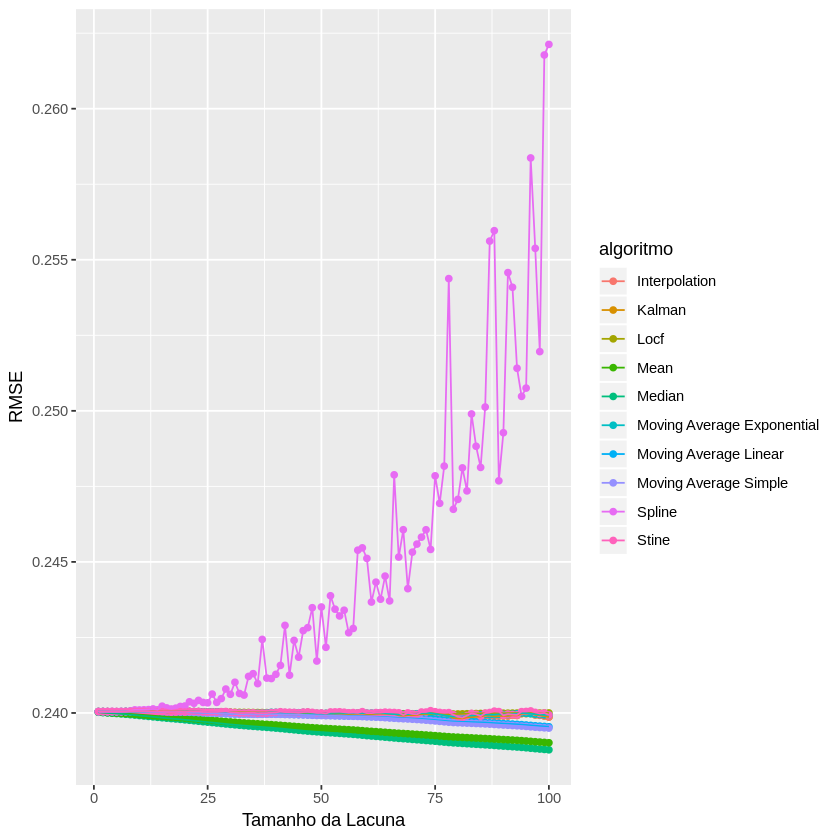

In [5]:
ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")


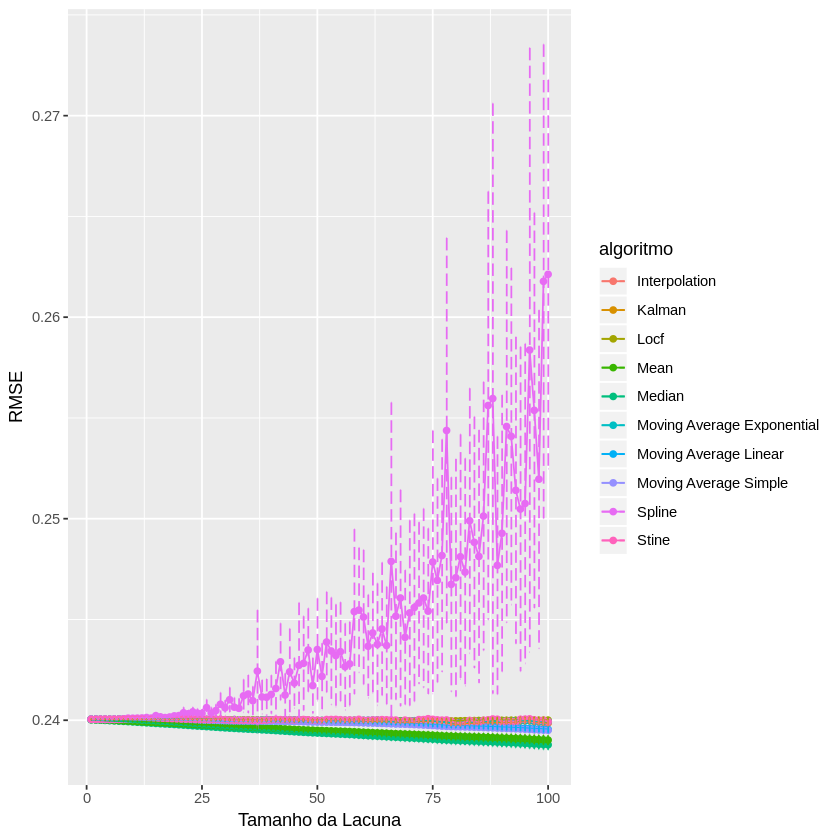

In [6]:
n=90 #tamanho da amostra. Ou seja, tem 90 lacunas de tamanho 1, 2 de tamanho 20... 90 de tamanho 100
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")


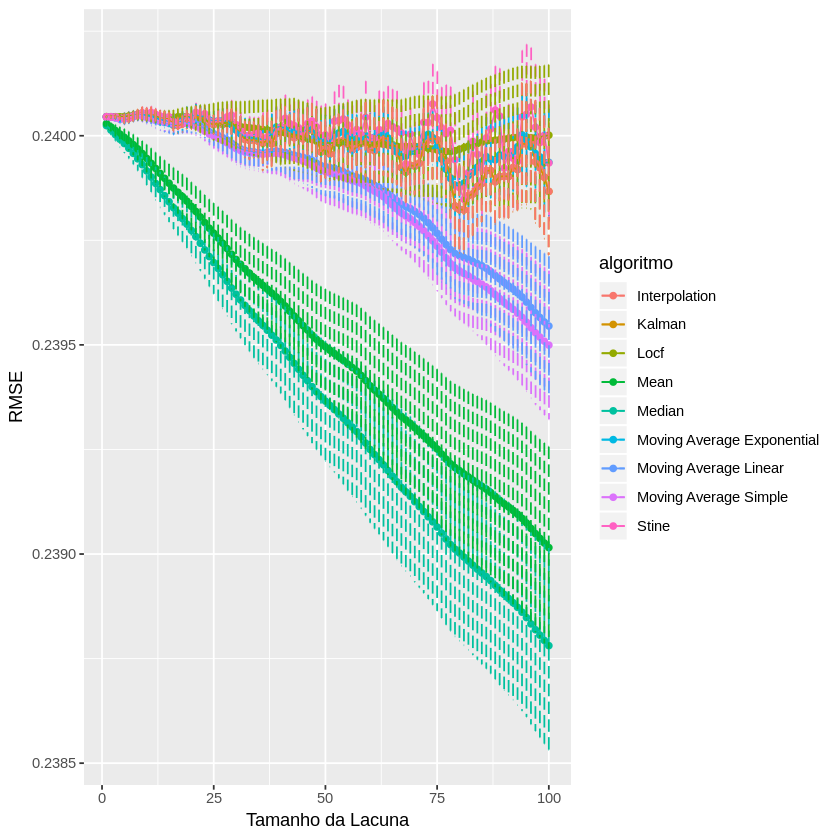

In [7]:
ggplot(todos[which(todos$algoritmo!= "Spline" & todos$tamanho<3000),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna") 
    


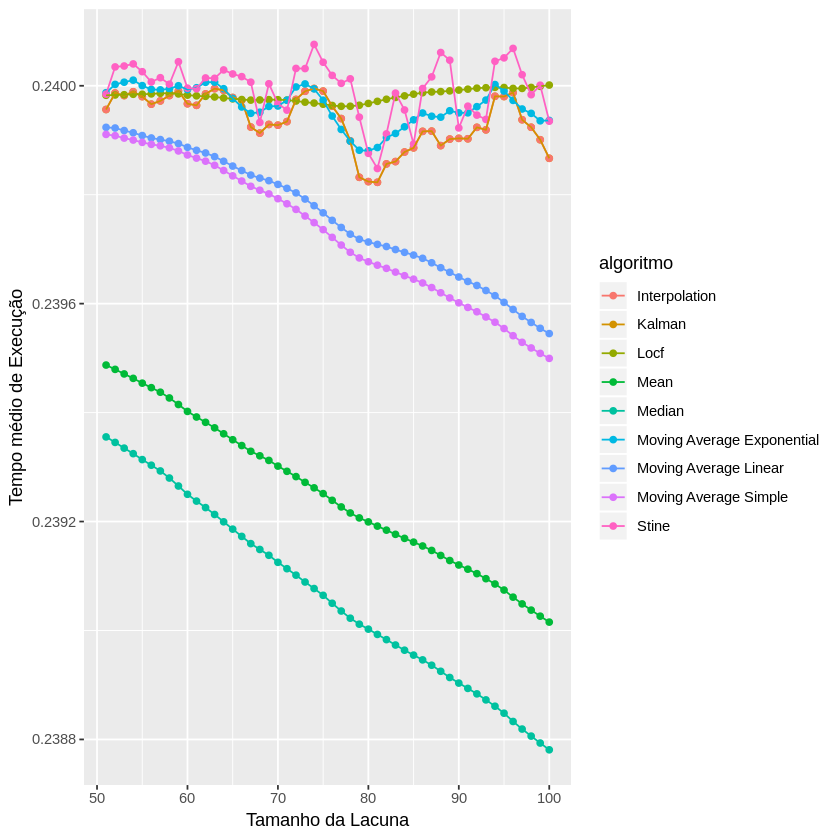

In [8]:

ggplot(todos[which(todos$algoritmo!= "Spline" & todos$tamanho>50),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
   # geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna") 
    


In [9]:
(filter(todos, tamanho==100))

media,sd,var,tamanho,algoritmo,error
0.2398668,0.0007332053,3.876957e-12,100,Kalman,0.0001514790
0.2398668,0.0007332047,3.876956e-12,100,Interpolation,0.0001514789
0.2400013,0.0008152602,5.583357e-12,100,Locf,0.0001684314
0.2387809,0.0012050668,2.790460e-11,100,Median,0.0002489648
0.2390154,0.0011682354,2.717979e-11,100,Mean,0.0002413555
0.2399363,0.0006198769,1.353696e-12,100,Moving Average Exponential,0.0001280655
0.2395451,0.0008063548,5.179925e-12,100,Moving Average Linear,0.0001665916
0.2394995,0.0008593710,6.766545e-12,100,Moving Average Simple,0.0001775446
0.2621282,0.0467061745,3.362938e-05,100,Spline,0.0096494183
0.2399349,0.0006733257,3.474829e-12,100,Stine,0.0001391080


In [15]:
teste=(select(todos[order(todos$tamanho, todos$media, decreasing=c(FALSE,FALSE)),], -sd))
head(todos)
head(teste)
by_mean <- group_by(teste, tamanho)
#summarise(by_mean, rmseMin = min(media))

media,sd,var,tamanho,algoritmo,error
0.2400453,7.220893e-06,3.888192e-20,1,Kalman,1.491825e-06
0.2400448,1.218005e-05,3.147606e-19,2,Kalman,2.516379e-06
0.2400446,1.415026e-05,5.075634e-19,3,Kalman,2.923421e-06
0.2400418,2.171842e-05,2.730362e-18,4,Kalman,4.486989e-06
0.2400404,5.370256e-05,1.152329e-16,5,Kalman,1.109486e-05
0.2400419,5.454220e-05,1.078261e-16,6,Kalman,1.126833e-05


,media,var,tamanho,algoritmo,error
301,0.2400243,2.041127e-17,1,Median,7.537923e-06
401,0.2400292,1.448308e-17,1,Mean,6.887952e-06
701,0.2400449,6.723100e-20,1,Moving Average Simple,1.762381e-06
601,0.2400450,6.026154e-20,1,Moving Average Linear,1.692098e-06
501,0.2400451,5.540240e-20,1,Moving Average Exponential,1.639061e-06
901,0.2400453,3.508078e-20,1,Stine,1.463791e-06


In [24]:
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, algoritmo)
#select(by_alg, -var,-error)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
tam=by_length %>% arrange(tamanho,media)
write.table(tam,"tamanhoEmedia.txt")
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
a
write.table(a, "min.txt")

tamanho,algoritmo,media
1,Median,0.2400243
2,Median,0.2400135
3,Median,0.2400026
4,Median,0.2399916
5,Median,0.2399813
6,Median,0.2399699
7,Median,0.2399578
8,Median,0.2399448
9,Median,0.2399308
10,Median,0.2399160


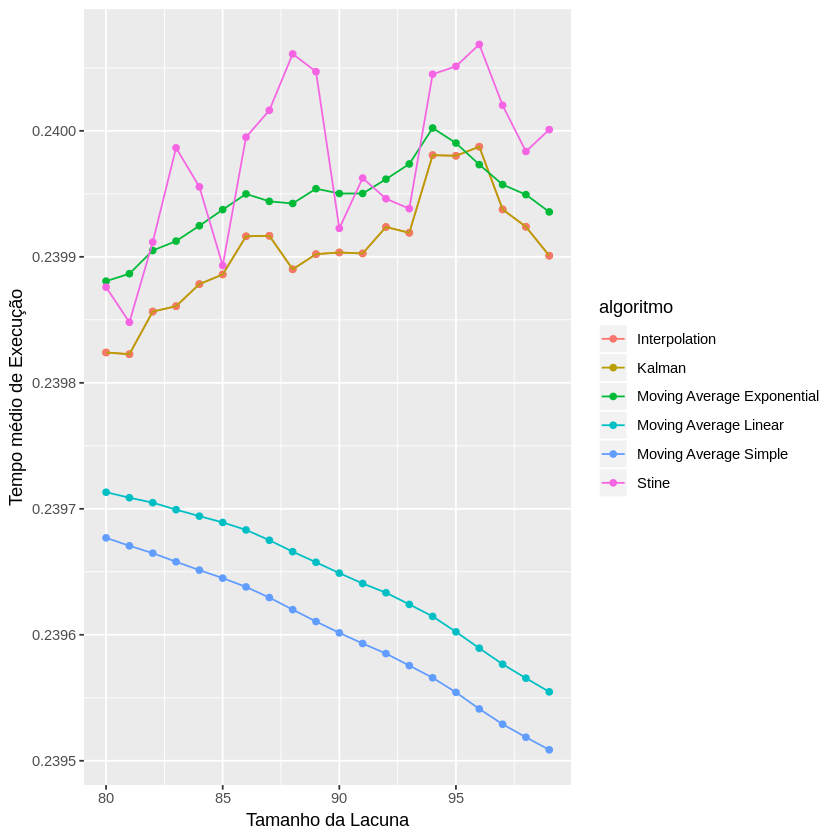

In [25]:
ggplot(todos[which(todos$algoritmo!= "Locf" & todos$algoritmo!= "Spline" & todos$algoritmo!= "Mean"  & todos$algoritmo!= "Median" &  todos$tamanho>=80 &  todos$tamanho<100),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    #geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna") 
    